# M4101, IUT Bordeaux, Reconnaissance de nombres avec Keras

In [1]:
import numpy as np
import keras
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


On importe le jeu de données MNIST de Keras.

In [2]:
from keras.datasets import mnist
(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()

In [3]:
print('Regardons le format de ces donnees\n')
print('X_train_0.shape',X_train_0.shape)
print('y_train_0.shape',y_train_0.shape)
print('X_test_0.shape',X_test_0.shape)
print('y_test_0.shape',y_test_0.shape)

Regardons le format de ces donnees

X_train_0.shape (60000, 28, 28)
y_train_0.shape (60000,)
X_test_0.shape (10000, 28, 28)
y_test_0.shape (10000,)


In [4]:
# On reformate les donnees pour qu'elles soient sous la forme de tableaux a deux dimensions
num_pixels = X_train_0.shape[1] * X_train_0.shape[2]
img_cols = X_train_0.shape[1]
img_rows = X_train_0.shape[2]
X_train  = X_train_0.reshape(X_train_0.shape[0], num_pixels)
X_test   = X_test_0.reshape(X_test_0.shape[0], num_pixels)
y_train  = y_train_0.reshape(y_train_0.shape[0], 1)
y_test   = y_test_0.reshape(y_test_0.shape[0], 1)
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
y_train  = y_train.astype('float32')
y_test   = y_test.astype('float32')
X_train  = X_train / 255
X_test   = X_test / 255

In [5]:
print('Regardons le format de ces donnees transformees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

Regardons le format de ces donnees transformees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)


## Exercice 1.
On veut apprendre à reconnaitre le chiffre 5.

In [6]:
# Dans un premier temps, on reformate les donnees pour que la classe associee aux images
# d'un 5 soit 1 et la classe des autres images soit 0

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

num_train_samples  = X_train.shape[0] # nombre de donnes d'apprenstissage
num_test_samples  = X_train.shape[0]  # nombre de donnees de test

In [7]:
print('Regardons les donnees reformatees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)
print('\nNombre d\'exemples',num_train_samples)
print('Nombre de pixels par image',num_pixels)

Regardons les donnees reformatees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)

Nombre d'exemples 60000
Nombre de pixels par image 784


In [8]:
# On ordonne aleatoirement les donnees d'apprentissage
np.random.seed(138)
shuffle_index = np.random.permutation(num_train_samples)
X_train, y_train = X_train[shuffle_index,:], y_train[shuffle_index,:]

In [10]:
# Afficher l'image i du jeu de donnees X et son score dans y
def show_image(i,X,Y):
    print('y[{}]={}'.format(i, Y[i,:]))
    plt.imshow(X[i,:].reshape(img_rows,img_cols), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

Regardons quelques images utilisees pour l'apprentissage
y[11]=[0.]


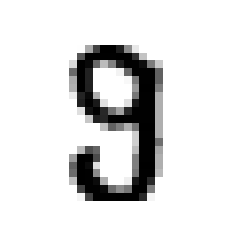

y[43]=[1.]


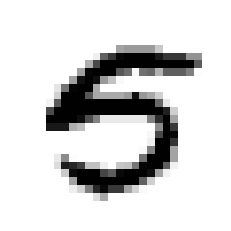

In [20]:
print('Regardons quelques images utilisees pour l\'apprentissage')
show_image(np.random.randint(0,100),X_train,y_train)
show_image(np.random.randint(0,100),X_train,y_train)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# Fonctions permettant de visualiser l'historique d'apprentissage
def plot_train_history_accuracy(history):
    acc = list(history.history.keys())[1]
    plt.plot(history.history[acc])
    plt.title('model accuracy')
    plt.ylabel(acc)
    plt.xlabel('epoch')
    plt.show()
    
def plot_train_history_loss(history):
    loss = list(history.history.keys())[0]
    plt.plot(history.history[loss])
    plt.title('model loss')
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.show()

## Exercice 1
On crée un modèle à un seul neurone, utilisant la fonction de perte binary_crossentropy, l'optimiseur adam et la métrique binary_accuracy (on fait de la classification binaire).

In [24]:
# Creation du modele
# -- Parametres du modele
model_1_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Archtitecture du modele
model_1 = Sequential()
model_1.add(Dense(1, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
# -- Compilation
model_1.compile(loss=model_1_functions['loss'],optimizer=model_1_functions['optimizer'],metrics=model_1_functions['metrics'])

In [25]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_1 = {'batch_size': 128, 'epochs': 10}
# -- Appresntissage: history capture ce qui s'est passe durant l'apprentissage
model_1_history = model_1.fit(X_train, y_train, batch_size=learning_parameters_1['batch_size'], epochs=learning_parameters_1['epochs'], verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


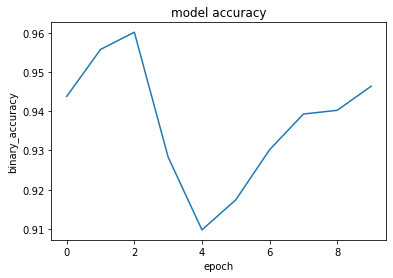

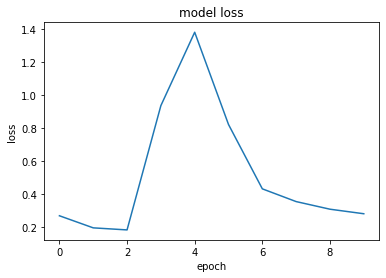

In [26]:
# -- Resume
model_1.summary()
plot_train_history_accuracy(model_1_history)
plot_train_history_loss(model_1_history)

In [27]:
# Prediction sur le jeu de test
final_loss_1, final_acc_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_1, final_acc_1))
y_test_predictions_1 = model_1.predict(X_test)

Perte finale sur les donnees de test: 0.234551, exactitude finale sur les donnees de test: 0.946300


y[8]=[0.]


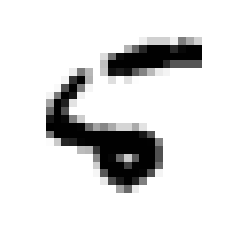

y[15]=[0.]


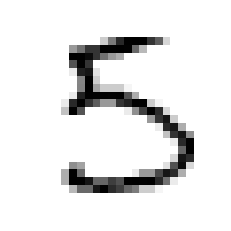

y[23]=[0.]


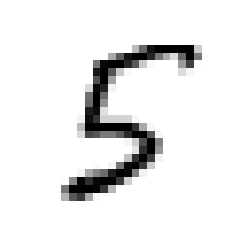

y[45]=[0.]


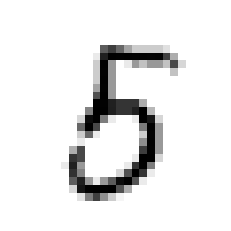

y[52]=[0.]


y[53]=[0.]


y[59]=[0.03428029]


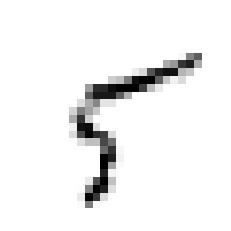

In [34]:
# Quelques exemples choisis au hasard
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_1)
    if y_test_predictions_1[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_1)

#### Commentaires?

## Exercice 2
On ajoute une couche cachée de 64 neurones

In [28]:
# Creation du modele
# -- Parametres du modele
model_2_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Archtitecture du modele
model_2 = Sequential()
model_2.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# -- Compilation
model_2.compile(loss=model_2_functions['loss'],optimizer=model_2_functions['optimizer'],metrics=model_2_functions['metrics'])

In [29]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_2 = {'batch_size': 128, 'epochs': 10}
# -- Appresntissage: history capture ce qui s'est passe durant l'apprentissage
model_2_history = model_2.fit(X_train, y_train, batch_size=learning_parameters_2['batch_size'], epochs=learning_parameters_2['epochs'], verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 50,305
Trainable params: 50,305
Non-trainable params: 0
_________________________________________________________________


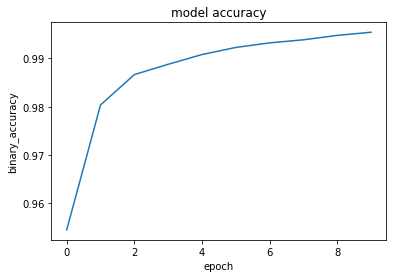

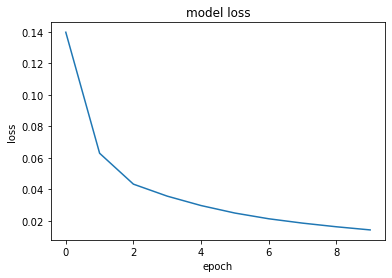

In [30]:
# -- Resume
model_2.summary()
plot_train_history_accuracy(model_2_history)
plot_train_history_loss(model_2_history)

In [31]:
# Prediction sur le jeu de test
final_loss_2, final_acc_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_2, final_acc_2))
y_test_predictions_2 = model_2.predict(X_test)

Perte finale sur les donnees de test: 0.020835, exactitude finale sur les donnees de test: 0.992000


y[8]=[0.06230514]


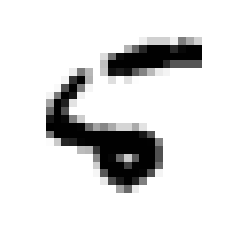

y[15]=[0.9640918]


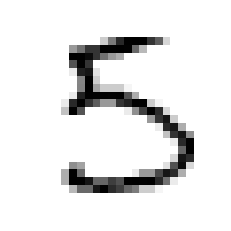

y[23]=[0.99525404]


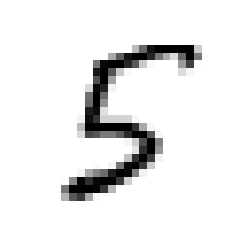

y[45]=[0.9579149]


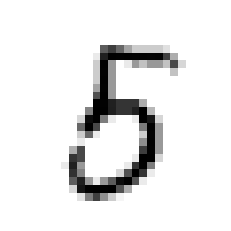

y[52]=[0.9949986]


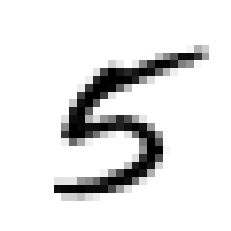

y[53]=[0.9798053]


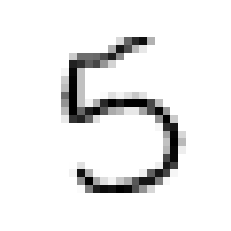

y[59]=[0.9811839]


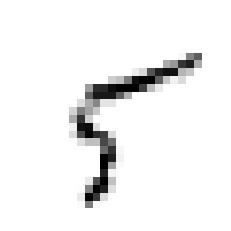

In [32]:
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_2)
    if y_test_predictions_2[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_2)

## Exercice 3
On modifie le reseau pour reconnaitre tous les chiffres et non plus seulement faire de la classification binaire (5 versus not-5).

In [33]:
from keras.utils import np_utils

num_classes = 10
y_train_cat = np_utils.to_categorical(y_train_0,num_classes)
y_test_cat  = np_utils.to_categorical(y_test_0,num_classes)

In [47]:
# Creation du modele
# -- Parametres du modele
model_3_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
# -- Archtitecture du modele
model_3 = Sequential()
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_3.compile(loss=model_3_functions['loss'],optimizer=model_3_functions['optimizer'],metrics=model_3_functions['metrics'])

In [48]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_3 = {'batch_size': 128, 'epochs': 50}
# -- Appresntissage: history capture ce qui s'est passe durant l'apprentissage
model_3_history = model_3.fit(X_train, y_train_cat, batch_size=learning_parameters_3['batch_size'], epochs=learning_parameters_3['epochs'], verbose=0)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


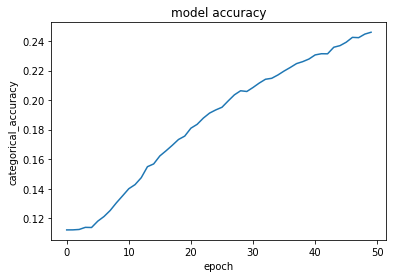

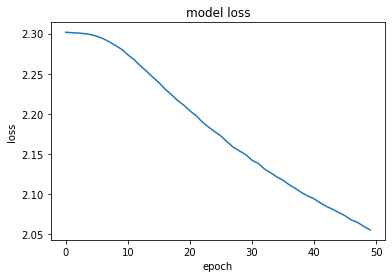

In [49]:
# -- Resume
model_3.summary()
plot_train_history_accuracy(model_3_history)
plot_train_history_loss(model_3_history)

In [50]:
# Prediction sur le jeu de test
final_loss_3, final_acc_3 = model_3.evaluate(X_test, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_3, final_acc_3))
y_test_predictions_3 = model_3.predict(X_test)

Perte finale sur les donnees de test: 2.633866, exactitude finale sur les donnees de test: 0.097100


y[0]=[0.09446257 0.07388563 0.01966892 0.10147092 0.22232588 0.03505832
 0.11272611 0.21250883 0.04305148 0.08484135]


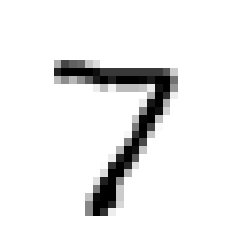

y[1]=[9.6672093e-03 3.3196232e-01 1.3454795e-04 1.3890024e-01 4.4124091e-01
 3.0799978e-04 1.0900659e-02 3.5745721e-02 2.4041634e-03 2.8736165e-02]


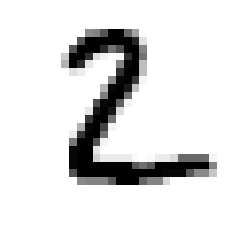

y[2]=[0.11077115 0.04535821 0.18699357 0.04296301 0.04418766 0.10652903
 0.11884321 0.09692764 0.08466706 0.16275951]


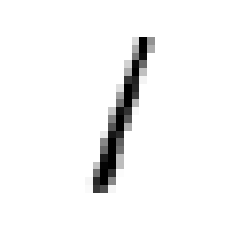

y[3]=[0.09492213 0.16422419 0.03319737 0.06923271 0.05185464 0.07200448
 0.09275915 0.06476887 0.20907024 0.1479662 ]


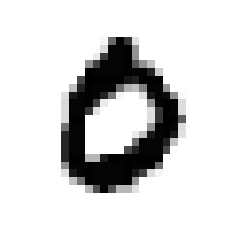

y[4]=[0.13177991 0.19680414 0.01365029 0.10560125 0.00719379 0.21541762
 0.08243088 0.05290508 0.14581701 0.04840001]


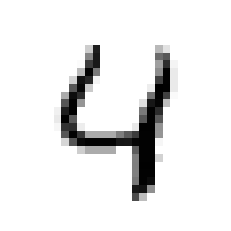

y[5]=[0.11313981 0.06560671 0.21269393 0.04605436 0.08548443 0.08387856
 0.10578755 0.13626951 0.09416106 0.05692402]


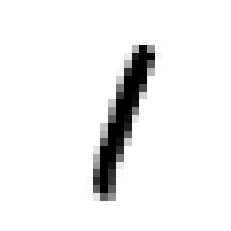

y[6]=[0.0206764  0.01685651 0.45808598 0.03847045 0.07620044 0.04904811
 0.00675648 0.08511654 0.21084902 0.03794006]


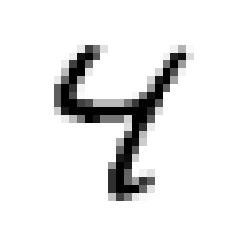

y[7]=[0.2561851  0.21641417 0.013291   0.09150783 0.04150499 0.05315666
 0.14560466 0.0417731  0.08135385 0.05920865]


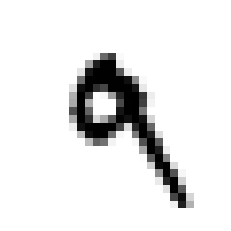

y[8]=[4.1325402e-04 1.0732945e-01 1.0811665e-02 2.3006596e-01 1.0036115e-01
 5.0245523e-03 5.6983009e-03 5.2686673e-01 4.7859298e-03 8.6430525e-03]


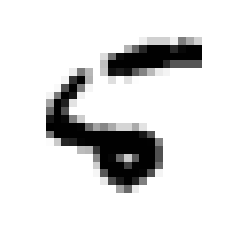

y[9]=[0.05972188 0.08041868 0.12423813 0.07782525 0.20131493 0.04444674
 0.09600008 0.1456731  0.06509718 0.1052641 ]


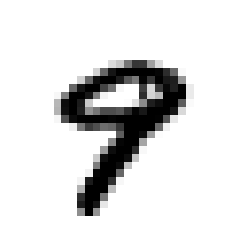

In [51]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_3)

## Exercice 4

Un reseau convolutif.

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
https://www.supinfo.com/articles/single/8037-deep-learning-reseau-convolution

In [40]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [41]:
# On reformate les donnees
X_train_cnn = np.expand_dims(X_train_0, axis=3)
X_test_cnn  = np.expand_dims(X_test_0, axis=3)
input_shape = (28,28,1)

In [42]:
# Creation du modele
# -- Parametres du modele
model_4_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
model_4_cnn_parameters = {'num_filters':8,'filter_size':3,'pool_size':2}
# -- Archtitecture du modele
model_4 = Sequential()
model_4.add(Conv2D(model_4_cnn_parameters['num_filters'], model_4_cnn_parameters['filter_size'], input_shape=input_shape, activation='relu'))
model_4.add(MaxPooling2D(pool_size=model_4_cnn_parameters['pool_size']))
model_4.add(Flatten())
model_4.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_4.compile(loss=model_4_functions['loss'],optimizer=model_4_functions['optimizer'],metrics=model_4_functions['metrics'])

In [43]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_4 = {'batch_size': 128, 'epochs': 5}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_4_history = model_4.fit(X_train_cnn, y_train_cat, batch_size=learning_parameters_4['batch_size'], epochs=learning_parameters_4['epochs'], verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


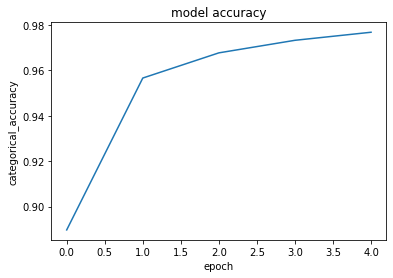

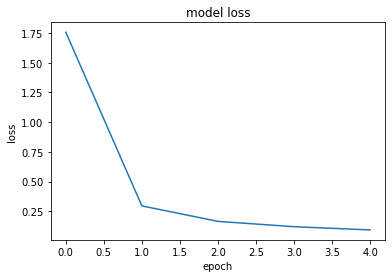

In [44]:
# -- Resume
model_4.summary()
plot_train_history_accuracy(model_4_history)
plot_train_history_loss(model_4_history)

In [45]:
# Prediction sur le jeu de test
final_loss_4, final_acc_4 = model_4.evaluate(X_test_cnn, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_4, final_acc_4))
y_test_predictions_4 = model_4.predict(X_test_cnn)

Perte finale sur les donnees de test: 0.143808, exactitude finale sur les donnees de test: 0.970600


y[0]=[8.2695628e-18 8.5192314e-23 3.5204515e-14 5.1647779e-09 5.7127058e-19
 5.2804299e-18 9.5216704e-23 1.0000000e+00 8.6342879e-14 1.6824563e-10]


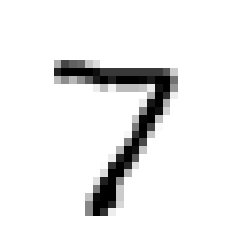

y[1]=[1.2236283e-11 9.8595191e-14 9.9993324e-01 3.4090764e-13 9.4346827e-26
 1.0133651e-16 6.6812216e-05 3.0744666e-25 2.1506261e-14 8.7809839e-26]


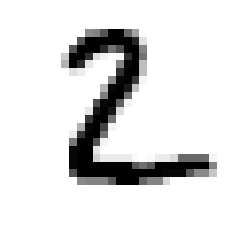

y[2]=[9.3130914e-10 9.9964333e-01 2.3201595e-07 8.9715853e-09 1.4837859e-04
 1.7574717e-09 9.6063809e-07 1.3149275e-06 2.0585126e-04 7.9615198e-10]


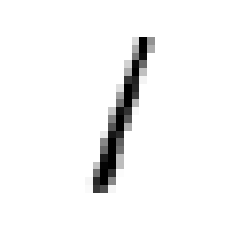

y[3]=[9.9999988e-01 2.2093033e-18 3.5923725e-10 2.9229145e-13 1.8921332e-11
 7.9348327e-15 4.6033991e-10 5.5316982e-15 1.1952231e-12 8.3516021e-08]


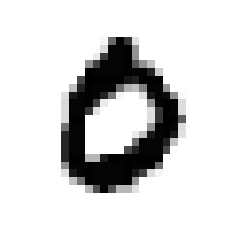

y[4]=[3.0153505e-11 6.9977784e-19 3.5419185e-13 4.8943266e-13 1.0000000e+00
 1.6252829e-18 3.7574407e-15 1.7819108e-15 1.7170531e-11 4.0401310e-10]


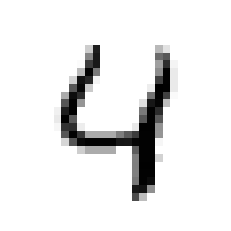

y[5]=[1.4196702e-10 9.9825650e-01 3.8404946e-06 4.1162678e-09 1.2381324e-04
 7.0041778e-11 1.7664966e-08 1.5942290e-03 2.1508005e-05 9.0070316e-08]


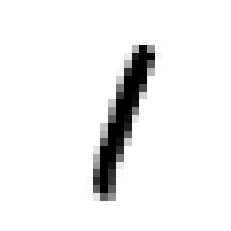

y[6]=[1.9821663e-19 9.6542403e-14 1.8675420e-13 3.9945992e-14 9.9999976e-01
 3.5394779e-14 1.5277812e-15 1.4018111e-14 2.5876457e-07 7.5467861e-11]


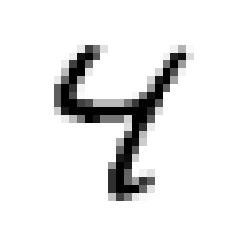

y[7]=[1.9490885e-15 2.6739758e-14 4.9403006e-09 7.3880230e-08 2.3854769e-05
 1.3702162e-06 6.0446982e-13 5.8930730e-13 2.6341616e-03 9.9734050e-01]


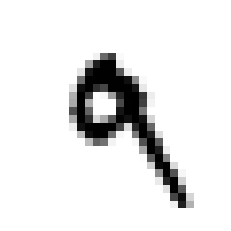

y[8]=[1.0630882e-08 3.6706856e-16 1.5959747e-13 7.4410762e-11 1.8817840e-06
 8.3245975e-01 1.6748920e-01 1.1566362e-18 4.9147497e-05 1.0594184e-08]


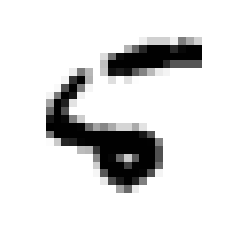

y[9]=[1.02789634e-11 1.29235524e-23 2.87606315e-18 5.49000342e-12
 2.14380520e-06 2.05477736e-12 5.36330509e-17 9.23854088e-07
 1.11355938e-08 9.99996901e-01]


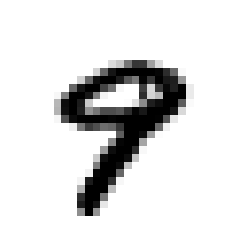

In [46]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_4)